# Assignment 1

Name: K. Sai Somanath <br/>
Reg No: 18MCMT28

## Question 1

Search the Web for Cumani colour edge detector and write a report on it. Analyse how it may be better than doing Sobel edge detection three times on an RGB image.

## Cumani's Operation

* This algorithm is based on Cumani’s idea to compute zero–crossings in the second directional derivative of a color image. 
* In this approach color image is considered as two dimensional vector field with three components R, G and B. 
$$
C(x, y) = (C_1(x, y), C_2(x, y), C_3(x, y))
$$
Here, $C_i$ in RBG space corresponds to R(x,y), G(x,y), and B(x,y).

* Cumani defines the **Square local contrast** $S(P, n)$ of a point P(x, y) as squared norm of the directional derivative of C in the direction of the unit vector $n = (n1, n2)$. This contrast is given by:

$$
K·n^2_1 + 2· F· n_1n_2 + H· n^2_2
$$

Where,

$ 
K = \sum^3_{i=1}\frac{\partial C_i}{\partial x} * \frac{\partial C_i}{\partial x} 
$

$ 
F = \sum^3_{i=1}\frac{\partial C_i}{\partial x} * \frac{\partial C_i}{\partial y} 
$

$ 
H = \sum^3_{i=1}\frac{\partial C_i}{\partial y} * \frac{\partial C_i}{\partial y} 
$

Consider the matrix:
$
  A =
  \left[ {\begin{array}{cc}
   K & F \\
   F & H \\
  \end{array} } \right]
$

Let $\alpha_\pm$ be the extreme values and $n_\pm$ be the eigen vectors. These extreme coincide with the extreme values of S(p; n) and are obtained if n is the corresponding eigenvector.

* Edge points; which have a particularly high contrast are sought.
* The maxima of $\alpha_+$ are calculated by deriving the function $\alpha_+(p)$, which is represented as a function of the location. Subsequently, the zeros of the derivative, which represent the maxima, are to be determined. 
* In order to find the zeros of $\alpha_+(p)$ defined in, the derivatives of this function can also be formed in direction n+

**Edge points in image are detected by computing zero–crossings of $D_s(P, n)$** considering the sign of $D_s$ along a curve tangent to $n_+$ at P. $D_s(P, n)$ is written as:

$$
D_s(P, n) = \nabla \alpha_+ · n_+ =  K_xn^3_1 + (K_y + 2F_x)n^2_1n_2 + (H_x + 2F_y)n_1n_2^2 + H_yn^3_2
$$

where indices x and y denote the corresponding derivatives with respect to x and y respectively.

Altogether, $D_s(P, n_+)$ is a form that is based on the second directional derivatives of the image function. **The edge points, which were defined as the maximum points of the first derivative of the image function, are represented in $D_s(P, n_+)$ by zeros (or zero-crossings in the digital grid).**

## Sobel's Operation

The Sobel operator is a discrete differential operator. The operator utilizes two 3x3 kernels: one
estimates the gradient in the x-direction, while the other one estimates the gradient in the y-direction.

$
  G_x =
  \left[ {\begin{array}{ccc}
   -1 & -2 & -1 \\
   0 & 0 & 0 \\
   1 & 2 & 1 \\
  \end{array} } \right]
$

$
  G_y =
  \left[ {\begin{array}{ccc}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1 \\
  \end{array} } \right]
$

The image is convolved with both kernels to approximate the derivatives in horizontal and vertical
change. At each given point, magnitude of the gradient can be approximated with: 

$
G = \lvert G_x \rvert + \lvert G_y \rvert
$

## Applying Sobel's operator 3 times vs Cumani's operator

### Sobel's Operation

* Sobel utilises monochromatic-based technique that treats information from the individual color channels or color vector components first separately and then combine together the individual results gained.

* Due to this, we will have to apply Sobel operation three times on the RBG image(since RGB has three channels).

* This combination operator can be one of the well norms such as $L_1$, $L_2$, or $L_\infty$

### Cumani's Operation

* Cumani's operation is a vector valued technique that considers all the three components of the color image at once.
* Cumani define a Square local contrast function that captures both the location and direction information.
* This new norm is based on the directional derivative of C.

### Pitfalls of Sobel

* Sobel fails when the image has noise.
* Sobel's accuracy decreses as the magnitude of edges decreases.
* Sobel cannot produce accurate edges that are thin and smooth.

### Merits of Cumani's Operator
* Cumani's operator coniders all the components as a single vector.
* It is more robust to noise in comparison to the Sobel operator due to the same reason.
* When cumani's operation is used with Guassian filters with high standard deviation, we can obtain very good results. 
* This might be due to the smoothing effect of the Guassian filters used.


## Question 2

Implement colour ranging operation in RGB space on colour images. The inputs for your operation are a colour image and a colour range specification as r_c, r_bw, g_c, g_bw, b_c, b_bw where r_c stands for red colour value, r_bw is the width of the range, i.e., colours between r_c - r_bw and r_c + r_bw must be retained in the image and all other 'r' values should be set to 0. The other parameters are for green and blue colours. You should handle errors when values go out of range.

In [4]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import cv2 as cv
import cv2

In [2]:
def colorRange(img, min_val, max_val):
    if img >= min_val and img <= max_val:
        return img
    else:
        return 0
colorRange = np.vectorize(colorRange)

Original Image


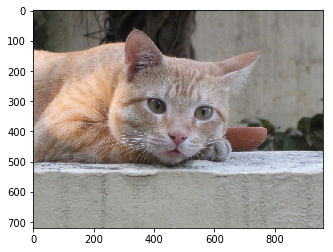

Image after ranging


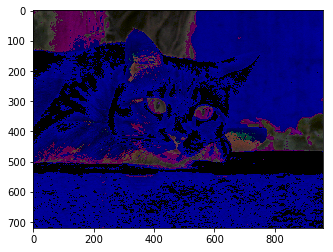

In [3]:
def colorRangeRGB(r_c, r_bw, g_c, g_bw, b_c, b_bw, image_path):
    # Find the minimun and maximum values of the range
    min_r = max(0, r_c - r_bw)
    max_r = min(255, r_c + r_bw)
    min_g = max(0, g_c - g_bw)
    max_g = min(255, g_c + g_bw)
    min_b = max(0, b_c - b_bw)
    max_b = min(255, b_c + b_bw)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = mpimg.imread(image_path)
    print("Original Image")
    plt.imshow(img)
    plt.show()
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_r, img_g, img_b = img[:,:,0], img[:,:,1], img[:,:,2]
    img_ranged[:,:,0] = colorRange(img_r, min_r, max_r)
    img_ranged[:,:,1] = colorRange(img_g, min_g, max_g)
    img_ranged[:,:,2] = colorRange(img_b, min_b, max_b)
    print("Image after ranging")
    plt.imshow(img_ranged)
    plt.show()
    
    
colorRangeRGB(50, 60, 20, 50, 90, 70, "Images/cat.ppm")

## Question 3

Implement colour ranging operation in HSV space on colour images. The inputs for your operation are a colour image and a colour range specification as h_c, h_bw, s_c, v_c where h_c stands for hue value, h_bw is the width of the range, i.e., colours between h_c - h_bw and h_c + h_bw must be retained in the image and all other hue values should be set to 0. The parameter s_c is a saturation threshold. Only those pixels with saturation value above the threshold should be retained. The parameter v_c is a value threshold and only pixels with value greater than v_c should be retained. You should handle errors when values go out of range.

In [4]:
def colorRangeH(img, v1, v2):
    if v1 > v2:
        return img if img >= v1 or img <= v2 else 0
    else:
        return img if img >= v1 and img <= v2 else 0
colorRangeH = np.vectorize(colorRangeH)

def colorRangeSV(img, threshold):
    if img > threshold:
        return img
    else:
        return 0
colorRangeSV = np.vectorize(colorRangeSV)

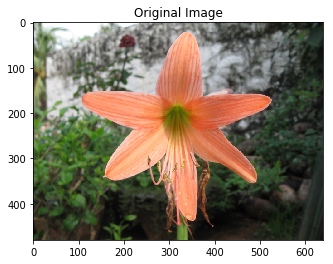

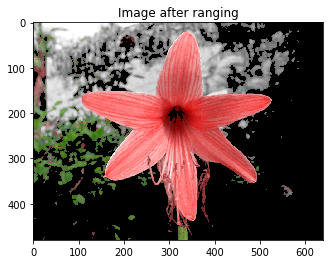

In [5]:
def colorRangeHSV(h_c, h_bw, s_c, v_c, image_path):
    # Find the minimun and maximum values of the range
    v1 = (h_c - h_bw) % 180
    v2 = (h_c + h_bw) % 180
    s_c = max(0, s_c)
    s_c = min(255, s_c)
    v_c = max(0, v_c)
    v_c = min(255, v_c)
    # print(min_r, max_r, min_g, max_g, min_b, max_g)
    
    # Read the image
    img = cv2.imread(image_path)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_ranged = np.zeros(img.shape, dtype="uint8")
    
    #Apply color ranging
    img_h, img_s, img_v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
    img_ranged[:,:,0] = colorRangeH(img_h, v1, v2)
    img_ranged[:,:,1] = colorRangeSV(img_s, s_c)
    img_ranged[:,:,2] = colorRangeSV(img_v, v_c)
    plt.title("Image after ranging")
    plt.imshow(cv2.cvtColor(img_ranged, cv2.COLOR_HSV2RGB))    
    
colorRangeHSV(60, 20, 50, 100, "Images/orange-flower.ppm")

## Question 4

Implement vector median filter and any one of the basic vector edge detectors. Show example images to demonstrate that these are better than the grayscale versions for colour images.

## Vector Median Filter

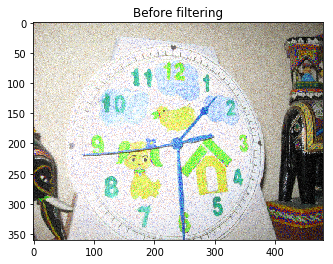

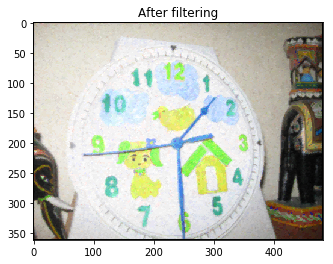

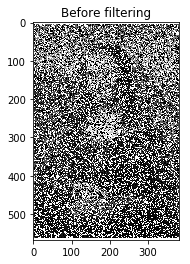

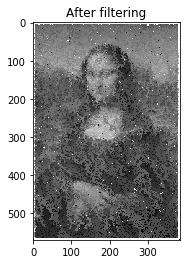

In [18]:
def VectorMedianFilter(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    neighbours = [[0,0,0]] * 9
    height, width = img_pad.shape[0], img_pad.shape[1]
    for i in range(1,height-1):
        for j in range(1,width-1):
            neighbours[0] = img_pad[i-1, j-1,:]
            neighbours[1] = img_pad[i-1, j,:]
            neighbours[2] = img_pad[i-1, j+1,:]
            neighbours[3] = img_pad[i, j-1,:]
            neighbours[4] = img_pad[i, j, :]
            neighbours[5] = img_pad[i, j+1, :]
            neighbours[6] = img_pad[i+1, j-1, :]
            neighbours[7] = img_pad[i+1, j, :]
            neighbours[8] = img_pad[i+1, j+1, :]
            mean = np.mean(neighbours, axis=0)
            dist = []
            for x in range(9):
                dist.append(np.linalg.norm(neighbours[x] - mean))
            least = np.argmin(dist)
            img_pad[i,j,:] = neighbours[least]
            
    plt.title('After filtering')
    plt.imshow(img_pad)
    plt.show()

img = cv2.imread("Images/clock.ppm")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorMedianFilter(img)

img = cv2.imread("Images/mona.png")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorMedianFilter(img)

## Median filter

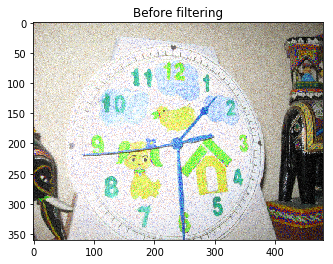

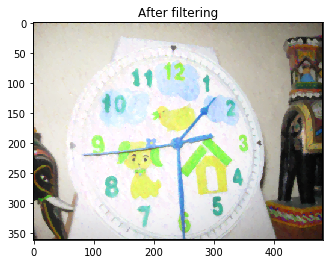

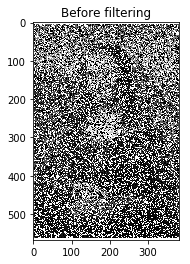

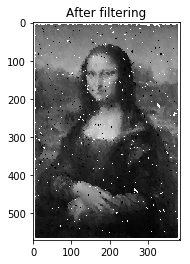

In [17]:
def MedianFilter(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    neighbours = [[0,0,0]] * 9
    height, width = img_pad.shape[0], img_pad.shape[1]
    for k in range(3):
        for i in range(1,height-1):
            for j in range(1,width-1):
                neighbours[0] = img_pad[i-1, j-1,k]
                neighbours[1] = img_pad[i-1, j,k]
                neighbours[2] = img_pad[i-1, j+1,k]
                neighbours[3] = img_pad[i, j-1,k]
                neighbours[4] = img_pad[i, j, k]
                neighbours[5] = img_pad[i, j+1, k]
                neighbours[6] = img_pad[i+1, j-1, k]
                neighbours[7] = img_pad[i+1, j, k]
                neighbours[8] = img_pad[i+1, j+1, k]
                neighbours.sort()
                img_pad[i,j,k] = neighbours[4]

    plt.title('After filtering')
    plt.imshow(img_pad)
    plt.show()
    
img = cv2.imread("Images/clock.ppm")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
MedianFilter(img)

img = cv2.imread("Images/mona.png")
plt.title('Before filtering')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
MedianFilter(img)

## Sobel edge detector

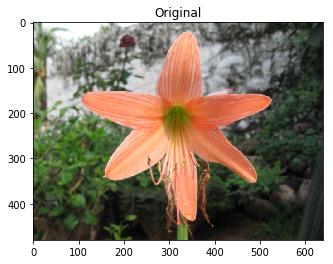

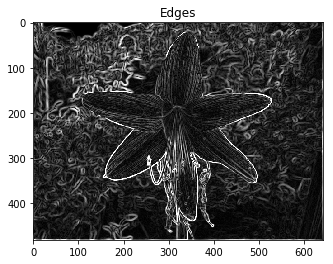

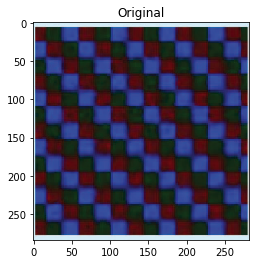

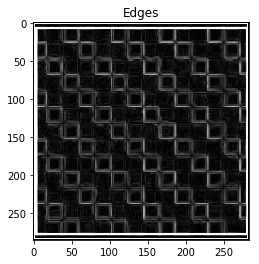

In [8]:
def SobelED(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    height, width = img_pad.shape[0], img_pad.shape[1]
    new_image = img_pad.copy()
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_y = sobel_x.T
    neighbours = [0] * 9
    for i in range(1,height-1):
        for j in range(1,width-1):
            neighbours[0] = img_pad[i-1, j-1]
            neighbours[1] = img_pad[i-1, j]
            neighbours[2] = img_pad[i-1, j+1]
            neighbours[3] = img_pad[i, j-1]
            neighbours[4] = img_pad[i, j]
            neighbours[5] = img_pad[i, j+1]
            neighbours[6] = img_pad[i+1, j-1]
            neighbours[7] = img_pad[i+1, j]
            neighbours[8] = img_pad[i+1, j+1]
            neighbours = np.array(neighbours).reshape(3, 3)
            conv_x = neighbours * sobel_x
            conv_y = neighbours * sobel_y
            new_image[i,j] = min(255, np.sqrt(conv_x.sum() ** 2 + conv_y.sum() ** 2))
            neighbours = neighbours.flatten()
            
    
    plt.title('Edges')
    plt.imshow(new_image, cmap='gray')
    plt.show()
        
        
img = cv2.imread("Images/orange-flower.ppm")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
SobelED(img)

img = cv2.imread("Images/edges.png")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
SobelED(img)

## Vector edge detector

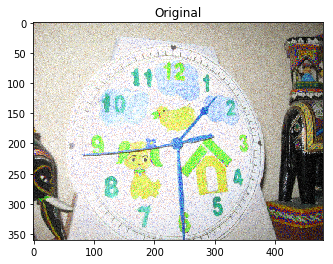

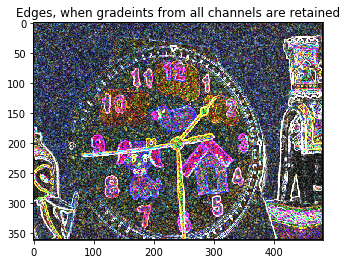

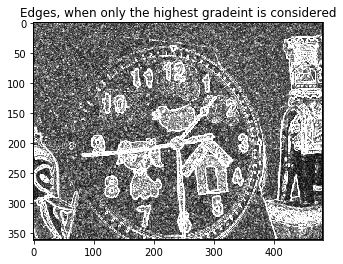

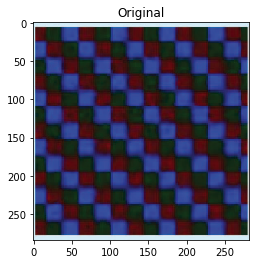

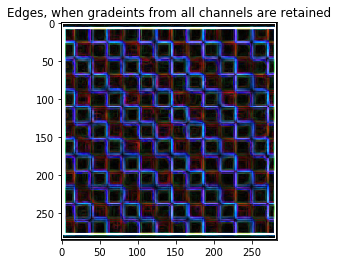

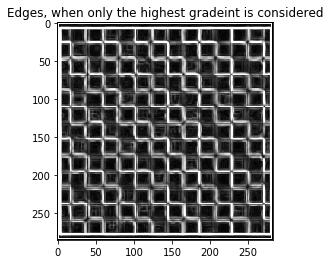

In [27]:
def VectorED(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
    # Pad the image
    img_pad = cv2.copyMakeBorder(img_rgb, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    height, width = img_pad.shape[0], img_pad.shape[1]
    # new_image = np.zeros(img_pad.shape)
    new_image = img_pad.copy()
    sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobel_y = sobel_x.T
    neighbours = [0] * 9
    for k in range(3):
        for i in range(1,height-1):
            for j in range(1,width-1):
                neighbours[0] = img_pad[i-1, j-1, k]
                neighbours[1] = img_pad[i-1, j, k]
                neighbours[2] = img_pad[i-1, j+1, k]
                neighbours[3] = img_pad[i, j-1, k]
                neighbours[4] = img_pad[i, j, k]
                neighbours[5] = img_pad[i, j+1, k]
                neighbours[6] = img_pad[i+1, j-1, k]
                neighbours[7] = img_pad[i+1, j, k]
                neighbours[8] = img_pad[i+1, j+1, k]
                neighbours = np.array(neighbours).reshape(3, 3)
                conv_x = neighbours * sobel_x
                conv_y = neighbours * sobel_y
                new_image[i, j, k] = min(255, np.sqrt(conv_x.sum() ** 2 + conv_y.sum() ** 2))
                neighbours = neighbours.flatten()
    # The magnitude of the gradient for a given pixel is the highest among all the channels...
    img_grad = new_image.max(axis=2)
    
    plt.title('Edges, when gradeints from all channels are retained')
    plt.imshow(new_image, cmap="gray")
    plt.show()
    plt.title('Edges, when only the highest gradeint is considered')
    plt.imshow(img_grad, cmap="gray")
    plt.show()
        
        
img = cv2.imread("Images/clock.ppm")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorED(img)

img = cv2.imread("Images/edges.png")
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
VectorED(img)

We from the above results can conclude that:
1. The **median filter** performs better than the **Vector median filter**
2. The **Vector edge detector** works better than the **sobel edge detector**

(360, 480)


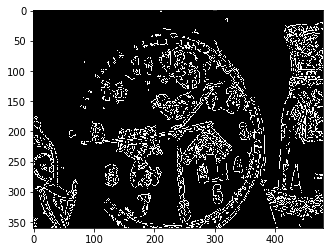

In [28]:
img = cv2.imread("Images/clock.ppm")
img_c = cv2.Canny(img, 160, 400)
print(img_c.shape)
plt.imshow(img_c, cmap="gray")

In [15]:
??cv2.Canny